In [21]:
!pip install pycocotools

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [22]:
!pip install --upgrade scikit-image scipy


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/33/29/1d696450464d6e13358d3ef185a1fb14a11181c5dab1eb2837c02be86373/scikit_image-0.21.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
Using cached scikit_image-0.21.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.9 MB)
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.20.0
    Uninstalling scikit-image-0.20.0:
      Successfully uninstalled scikit-image-0.20.0

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [23]:
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import seaborn as sns
import numpy as np

from random import shuffle
from PIL import Image

from pycocotools.coco import COCO

In [32]:

annFile='/home/roufa/Desktop/pems/test_working.json'
imageDir = '/home/roufa/Desktop/pems/pdf_images/'

# Initialize the COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!


In [36]:
image_ids = coco.getImgIds()
image_id = image_ids[4]  # Change this line to display a different image
image_info = coco.loadImgs(image_id)
print(image_info)

[{'id': 571, 'width': 1025, 'height': 1026, 'file_name': 'Doc_48_56.png', 'doc_name': 'Doc_48.pdf', 'collection': 'apex_repors', 'page_no': 57, 'precedence': 0}]


In [37]:
annotation_ids = coco.getAnnIds(imgIds=image_id)
annotations = coco.loadAnns(annotation_ids)
print(annotations)

[{'id': 30898, 'image_id': 571, 'category_id': 9, 'bbox': [120.58120098039217, 79.05021681818178, 81.93408848039218, 12.98045454545452], 'segmentation': [[120.58120098039217, 79.05021681818178, 120.58120098039217, 94.9145430258467, 202.51528946078435, 94.9145430258467, 202.51528946078435, 79.05021681818178]], 'area': 1063.5417112429795, 'file_name': 'Doc_48_56.png', 'iscrowd': 0, 'precedence': 0}, {'id': 30899, 'image_id': 571, 'category_id': 1, 'bbox': [120.58823529411765, 109.4455963636364, 783.8422105392152, 12.98045454545452], 'segmentation': [[120.58823529411765, 109.4455963636364, 120.58823529411765, 796.8226650846698, 904.4304458333329, 796.8226650846698, 904.4304458333329, 109.4455963636364]], 'area': 10174.628184712876, 'file_name': 'Doc_48_56.png', 'iscrowd': 0, 'precedence': 0}, {'id': 30900, 'image_id': 571, 'category_id': 1, 'bbox': [120.58823529411765, 124.37311909090916, 275.6018191176473, 12.98045454545452], 'segmentation': [[120.58823529411765, 124.37311909090916, 120.

In [40]:
catID = 1
print(coco.loadCats(ids=catID))

# Get image ID that satisfies the given filter conditions
imgId = coco.getImgIds(catIds=[catID])[0]
print(imgId)

[{'supercategory': 'P', 'id': 1, 'name': 'P'}]
698


In [41]:
ann_ids = coco.getAnnIds(imgIds=[imgId], iscrowd=None)
print(ann_ids)

[37594, 37595, 37596, 37597, 37598, 37599, 37600, 37601, 37602, 37603, 37604, 37605, 37606, 37607, 37608, 37609, 37610, 37611, 37612, 37613, 37614, 37615, 37616, 37617, 37618, 37619, 37620, 37621, 37622, 37623, 37624, 37625, 37626, 37627, 37628, 37629, 37630, 37631, 37632, 37633, 37634, 37635, 37636, 37637, 37638, 37639, 37640, 37641, 37642, 37643, 37644, 37645]


Annotations for Image ID 698:
Doc_8_77.png


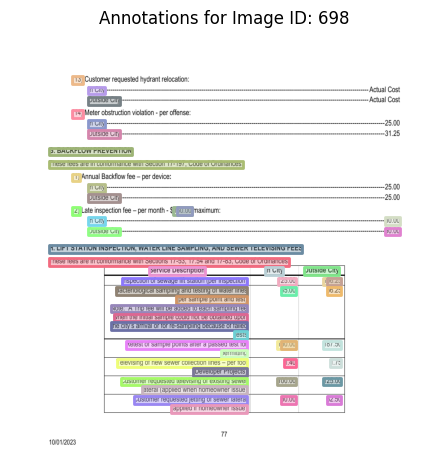

In [50]:
print(f"Annotations for Image ID {imgId}:")
# anns = coco.loadAnns(ann_ids)
anns = new_anns
image_path = coco.loadImgs(imgId)[0]['file_name']
print(image_path)
image = plt.imread(imageDir + image_path)
plt.imshow(image)

# Display the specified annotations
coco.showAnns(anns, draw_bbox=False)

plt.axis('off')
plt.title('Annotations for Image ID: {}'.format(image_id))
plt.tight_layout()
plt.show()